In [1]:
%load_ext autoreload

%autoreload

In [2]:
import sys
!{sys.executable} -m pip install SimpleITK

In [21]:
import json
import sys
import cv2
import json
import h5py
import numpy as np
import SimpleITK as sitk
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# custom
from interactive_dummy_aligner import display_images
from utils import blend_images, normalize_pixel_values, convert_to, plot_two_imgs, resize_img, rgb_to_grayscale, select_appropriate_pyramid_level, rescale_img, pad_img
from ants_registration import ants_registration, plot_images

In [4]:
# load two images : one blockface + one transmittance
data = json.load(open('pli_paths.json'))

bf_path = data['blockface']['920']
trans_path = data['transmittance']['920']

bf_path = bf_path.replace("/p/data1/", "/home/zeynepboztoprak/p/data1/")
trans_path = trans_path.replace("/p/data1/", "/home/zeynepboztoprak/p/data1/")

bf_fd = h5py.File(bf_path, 'r')
trans_fd = h5py.File(trans_path, 'r')

In [5]:
pyramid_level = select_appropriate_pyramid_level(trans_path, bf_path)

bf_img = bf_fd['Image'][:]
trans_img = trans_fd['pyramid'][pyramid_level][:]

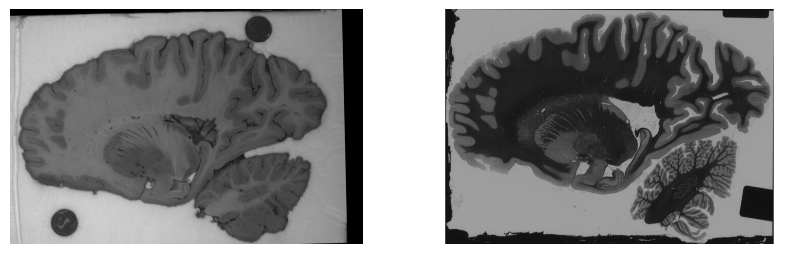

((3648, 5472), (3648, 5472))

In [6]:
bf_img = convert_to(bf_img, np.float32)
trans_img = convert_to(trans_img, np.float32)

bf_img = normalize_pixel_values(bf_img, max_val=1.)
trans_img = normalize_pixel_values(trans_img, max_val=1.)

bf_img = rgb_to_grayscale(bf_img)
trans_img = rescale_img(trans_img, bf_img.shape)

trans_img = pad_img(trans_img, bf_img.shape, padding_value=1.)

plot_two_imgs(bf_img, trans_img)

bf_img.shape, trans_img.shape

In [7]:
np.max(bf_img), np.min(bf_img), np.max(trans_img), np.min(trans_img)

(0.93964136, 0.0, 1.0, -0.07122308)

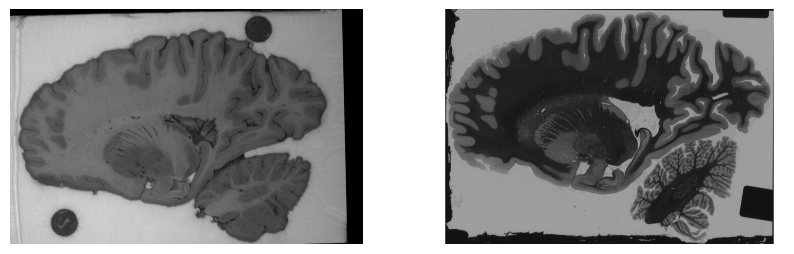

In [8]:
bf_img = bf_img * 255.
trans_img = trans_img * 255.

plot_two_imgs(bf_img, trans_img)

(-0.5, 5471.5, 3647.5, -0.5)

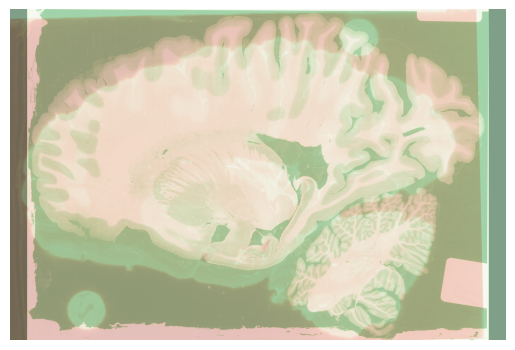

In [34]:
fig, axes = plt.subplots(1,1)

axes.imshow(bf_img, cmap='Reds', alpha=0.5)
axes.imshow(trans_img, cmap='Greens', alpha=0.5)
axes.axis('off')

In [9]:
np.max(bf_img), np.min(bf_img), np.max(trans_img), np.min(trans_img)

(239.60855, 0.0, 255.0, -18.161886)

In [10]:
## with inverted trans
trans_img_inv = 255. - trans_img
## with inverted bf
bf_img_inv = 255. - bf_img

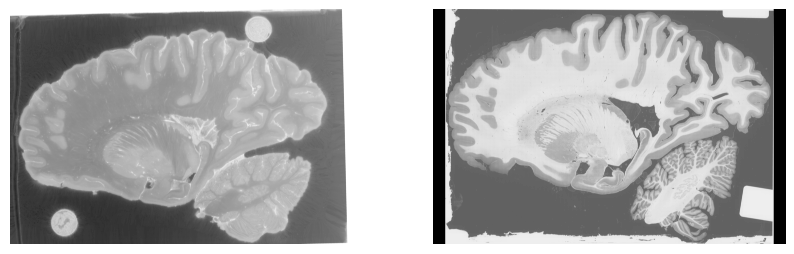

In [11]:
plot_two_imgs(bf_img_inv, trans_img_inv)

# SyN: Symmetric normalization: Affine + deformable transformation, with mutual information as optimization metric.

In [18]:
registration = ants_registration(fixed=bf_img, moving=trans_img, type_of_transformation='SyN')

registered_image = registration['registered']
registered_inverse_transformed = registration['registered_inv_transformed']
moving_transformed = registration['moving_transformed']

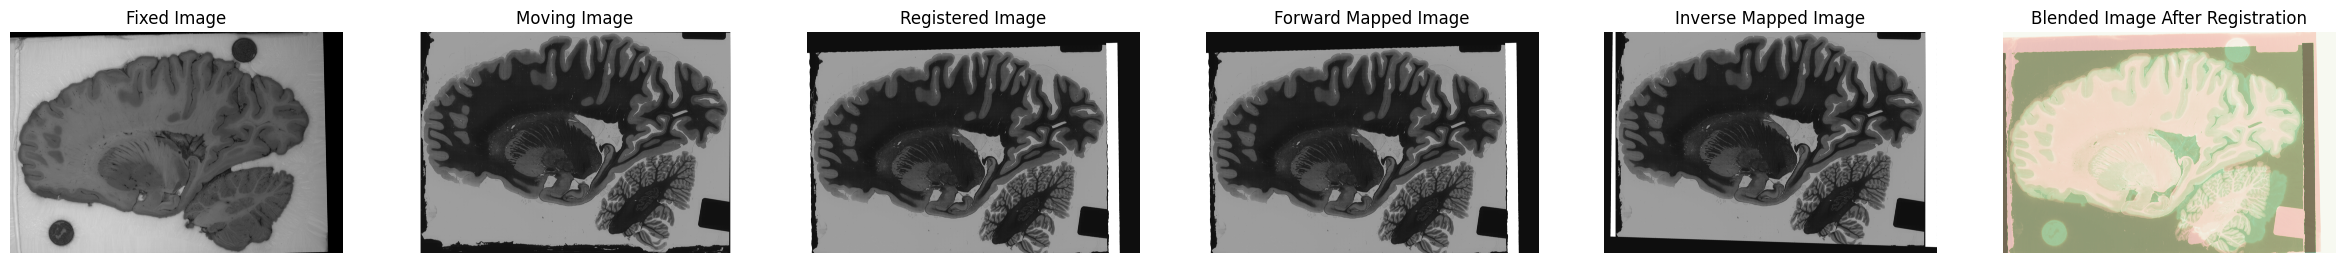

In [19]:
plot_images(bf_img, trans_img, registered_image, moving_transformed, registered_inverse_transformed)

(-0.5, 5471.5, 3647.5, -0.5)

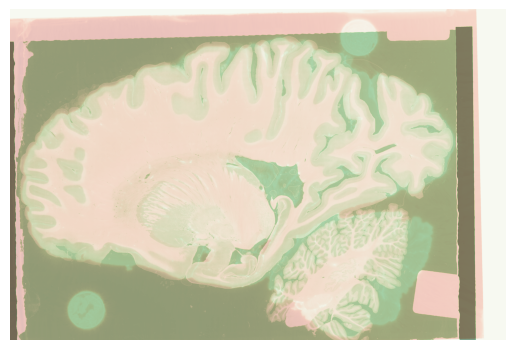

In [35]:
fig, axes = plt.subplots(1,1)

axes.imshow(bf_img, cmap='Reds', alpha=0.5)
axes.imshow(registered_image, cmap='Greens', alpha=0.5)
axes.axis('off')

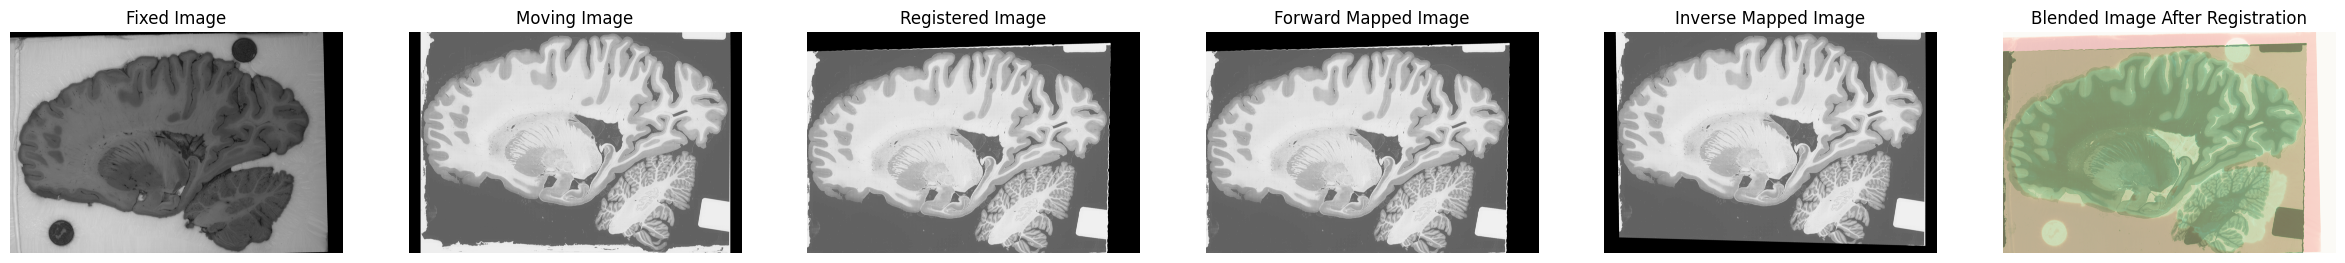

In [36]:
## (1) with inverted trans
registration = ants_registration(fixed=bf_img, moving=trans_img_inv, type_of_transformation='SyN')

registered_image = registration['registered']
registered_inverse_transformed = registration['registered_inv_transformed']
moving_transformed = registration['moving_transformed']

plot_images(bf_img, trans_img_inv, registered_image, moving_transformed, registered_inverse_transformed)

(-0.5, 5471.5, 3647.5, -0.5)

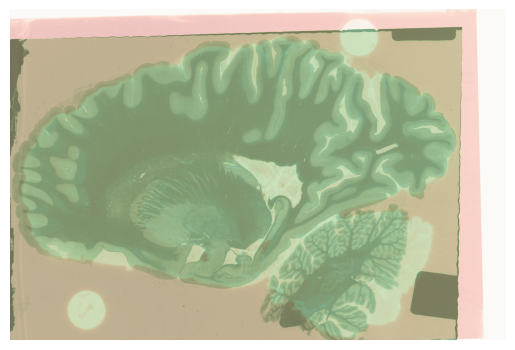

In [38]:
fig, axes = plt.subplots(1,1)

axes.imshow(bf_img, cmap='Reds', alpha=0.5)
axes.imshow(registered_image.numpy(), cmap='Greens', alpha=0.5)
axes.axis('off')

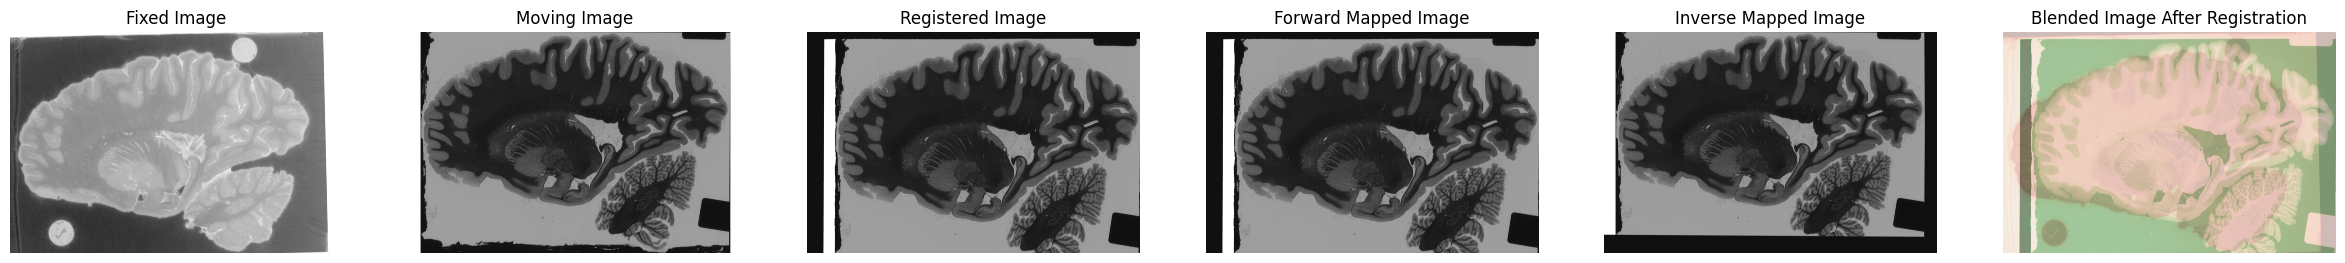

In [39]:
## (2) with inverted bf
registration = ants_registration(fixed=bf_img_inv, moving=trans_img, type_of_transformation='SyN')

registered_image = registration['registered']
registered_inverse_transformed = registration['registered_inv_transformed']
moving_transformed = registration['moving_transformed']

plot_images(bf_img_inv, trans_img, registered_image, moving_transformed, registered_inverse_transformed)

(-0.5, 5471.5, 3647.5, -0.5)

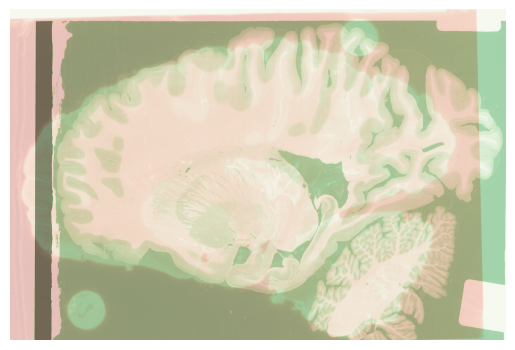

In [41]:
fig, axes = plt.subplots(1,1)

axes.imshow(bf_img, cmap='Reds', alpha=0.5)
axes.imshow(registered_image.numpy(), cmap='Greens', alpha=0.5)
axes.axis('off')

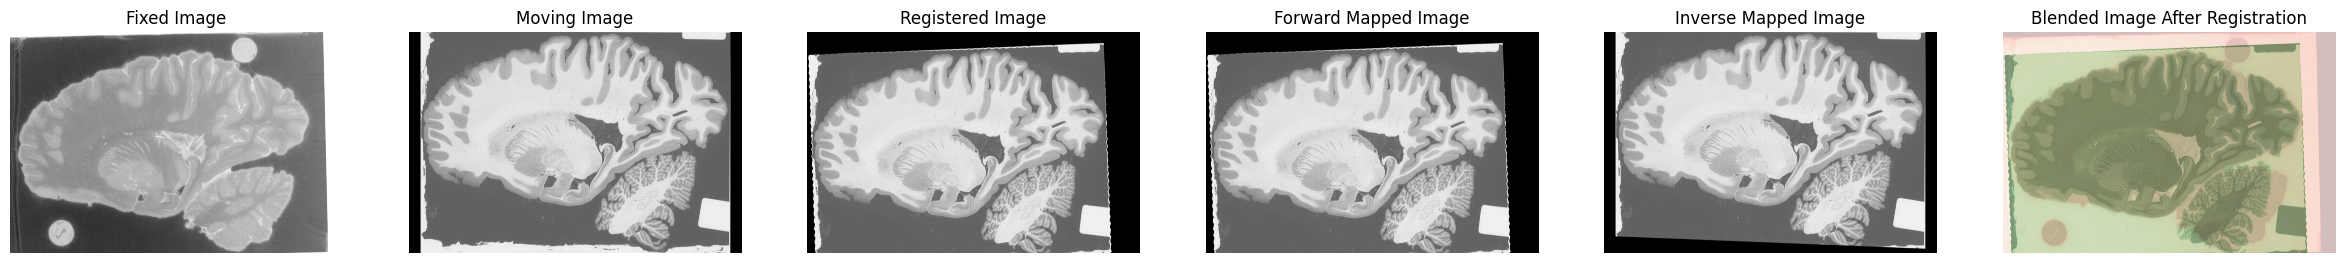

In [42]:
## (3) with inverted bf + inverted trans
registration = ants_registration(fixed=bf_img_inv, moving=trans_img_inv, type_of_transformation='SyN')

registered_image = registration['registered']
registered_inverse_transformed = registration['registered_inv_transformed']
moving_transformed = registration['moving_transformed']

plot_images(bf_img_inv, trans_img_inv, registered_image, moving_transformed, registered_inverse_transformed)

(-0.5, 5471.5, 3647.5, -0.5)

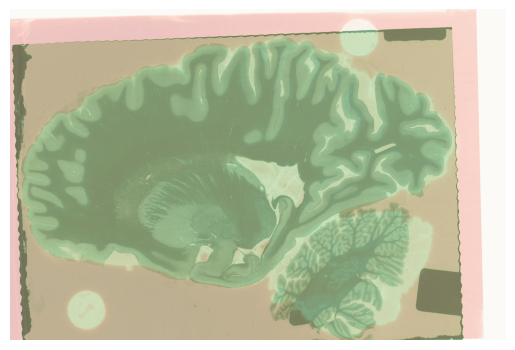

In [43]:
fig, axes = plt.subplots(1,1)

axes.imshow(bf_img, cmap='Reds', alpha=0.5)
axes.imshow(registered_image.numpy(), cmap='Greens', alpha=0.5)
axes.axis('off')